In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
import sklearn

In [6]:
df = pd.read_csv('E:\PimaIndians.csv')
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif


In [7]:
df.test.replace('negatif', 0, inplace=True)

In [8]:
df.test.replace('positif', 1, inplace=True)

In [9]:
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [10]:
df.dtypes

pregnant       int64
glucose        int64
diastolic      int64
triceps        int64
insulin        int64
bmi          float64
diabetes     float64
age            int64
test           int64
dtype: object

In [11]:
df.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
corrmat = df.corr()

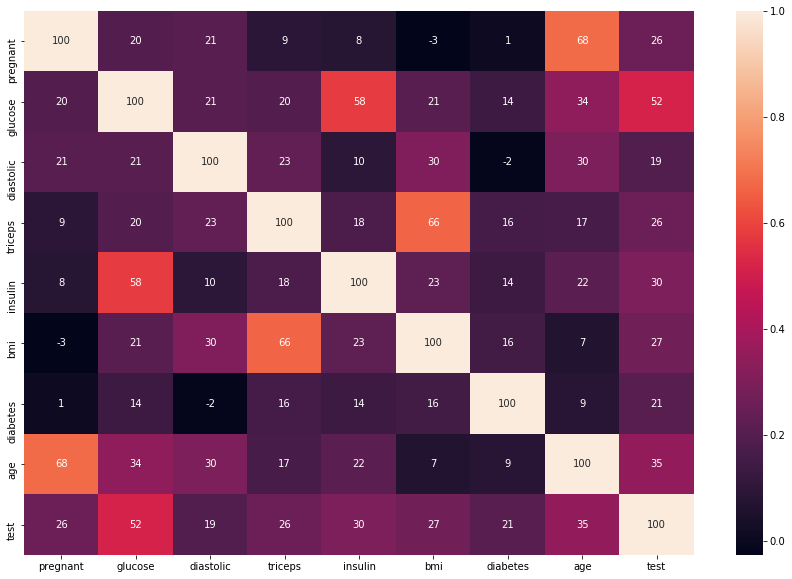

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data = corrmat, annot=corrmat*100, fmt='.0f')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [15]:
target = df.test
features = df.drop('test', axis = 1)
target.head()

0    0
1    1
2    1
3    1
4    1
Name: test, dtype: int64

In [16]:
features.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59


In [17]:
xtrain , xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state = 0)

In [18]:
print(xtrain.shape)

(313, 8)


In [19]:
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(79, 8)
(313,)
(79,)


In [20]:
clf = LogisticRegression()

In [21]:
clf.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
x=clf.predict(xtest)



In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(ytest,x)

0.7848101265822784

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
algo= RandomForestClassifier(random_state=0)

In [27]:
algo.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
y=algo.predict(xtest)

In [29]:
accuracy_score(ytest,y)

0.810126582278481

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
alg=GaussianNB()

In [32]:
alg.fit(xtrain,ytrain)

GaussianNB(priors=None)

In [33]:
z=algo.predict(xtest)

In [34]:
accuracy_score(ytest,z)

0.810126582278481

In [35]:
accuracy_score( ytrain ,alg.predict(xtrain)) # checking overfitting

0.7635782747603834

In [36]:
from sklearn.svm import SVC

In [37]:
alg=SVC()

In [38]:
alg.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
k=algo.predict(xtest)

In [40]:
accuracy_score(ytest,k)

0.810126582278481